In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('azcabgptca.csv')

In [39]:
df.head()

,died,procedure,age,gender,los,type
0,0,1,73,0,51,0
1,0,0,67,0,30,1
2,0,1,69,0,43,0
3,0,1,65,0,32,0
4,0,1,79,0,42,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   died       1959 non-null   int64
 1   procedure  1959 non-null   int64
 2   age        1959 non-null   int64
 3   gender     1959 non-null   int64
 4   los        1959 non-null   int64
 5   type       1959 non-null   int64
dtypes: int64(6)
memory usage: 92.0 KB


In [44]:
df.died.value_counts()

0    1923
1      36
Name: died, dtype: int64

<AxesSubplot:xlabel='died', ylabel='count'>

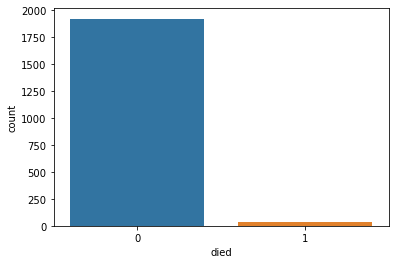

In [41]:
sns.countplot(x='died', data=df)

In [4]:
df.isnull().sum()

died         0
procedure    0
age          0
gender       0
los          0
type         0
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

x = df.drop(['died'], axis=1)
y = df.pop('died')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=0)

In [46]:
y_train.value_counts(1)

0    0.981765
1    0.018235
Name: died, dtype: float64

In [47]:
y_test.value_counts(1)

0    0.981293
1    0.018707
Name: died, dtype: float64

In [56]:
rfcl = RandomForestClassifier(n_estimators = 500,
                              random_state=0, oob_score=True)
rfcl = rfcl.fit(x_train, y_train)

rfcl

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)

In [57]:
rfcl.oob_score_

0.9788475565280816

In [51]:
pred_train = rfcl.predict(x_train)
pred_test = rfcl.predict(x_test)

In [52]:
from sklearn.metrics import plot_confusion_matrix,classification_report, plot_roc_curve,accuracy_score
import matplotlib.pyplot as plt

In [53]:
def eval_models(model,X,y,preds):
    print('Accuracy Score: ',accuracy_score(y,preds))
    plot_confusion_matrix(model,X,y)
    plt.show();
    plot_roc_curve(model,X,y)
    plt.show();
    print(classification_report(y,preds))

Accuracy Score:  0.9927060539752006


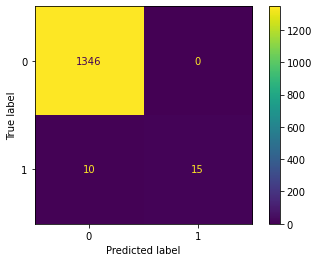

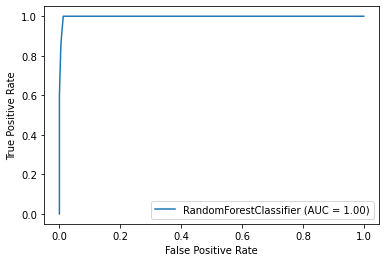

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1346
           1       1.00      0.60      0.75        25

    accuracy                           0.99      1371
   macro avg       1.00      0.80      0.87      1371
weighted avg       0.99      0.99      0.99      1371



In [54]:
eval_models(rfcl, x_train, y_train, pred_train)

Accuracy Score:  0.9863945578231292


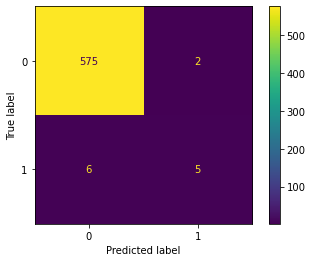

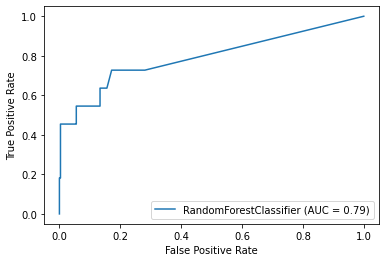

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       577
           1       0.71      0.45      0.56        11

    accuracy                           0.99       588
   macro avg       0.85      0.73      0.77       588
weighted avg       0.98      0.99      0.98       588



In [55]:
eval_models(rfcl,x_test,y_test,pred_test)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {
    'max_depth': [5,7,10],
    'max_features': [2, 4],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

In [24]:
rfcl = RandomForestClassifier(random_state=0)

In [25]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [26]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [2, 4],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [27]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [28]:
best_grid = grid_search.best_estimator_

In [29]:
best_grid

RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=5,
                       min_samples_split=50, random_state=0)

In [30]:
grid_pred_train = best_grid.predict(x_train)
grid_pred_test = best_grid.predict(x_test)

Accuracy Score:  0.9832239241429613


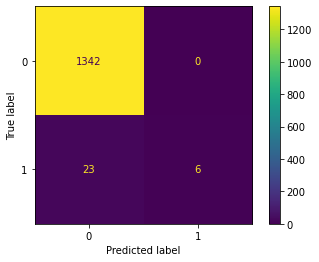

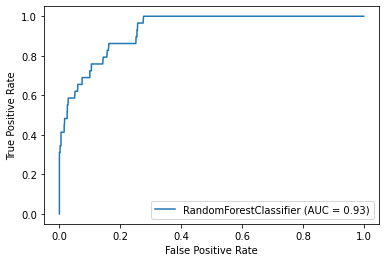

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1342
           1       1.00      0.21      0.34        29

    accuracy                           0.98      1371
   macro avg       0.99      0.60      0.67      1371
weighted avg       0.98      0.98      0.98      1371



In [31]:
eval_models(best_grid,x_train,y_train,grid_pred_train)

Accuracy Score:  0.9931972789115646


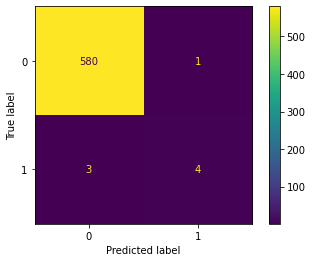

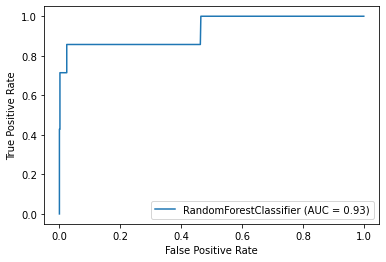

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       581
           1       0.80      0.57      0.67         7

    accuracy                           0.99       588
   macro avg       0.90      0.78      0.83       588
weighted avg       0.99      0.99      0.99       588



In [33]:
eval_models(best_grid,x_test,y_test,grid_pred_test)